In [0]:
# Building a movie cluster recommender system 

# The data that will be analyzed is open source movie ratings data. 
# Notes will be run in google colab under the High Resource mode, or else runtime will crash. 

# Dataset:
# https://grouplens.org/datasets/movielens/latest/
#
# Reference Documents:
# https://stackabuse.com/creating-a-simple-recommender-system-in-python-using-pandas/
 

In [0]:
## Importing Packages
try:
    import pandas as pd 
except:
    !pip3 install pandas
    import pandas as pd 
try:
    import numpy as np
except:
    !pip3 install numpy
    import numpy as np
try:
    import warnings
except:
    !pip3 install warnings
    import warnings

warnings.filterwarnings('ignore')

In [0]:
## Import the movies and ratings data sets to review
DF = pd.read_csv('ratings.dat', sep=',') # names=['user_id','movie_id','rating',"timestamp"]
moviesDF = pd.read_csv('movies.dat', sep=',')

FileNotFoundError: ignored

In [0]:
DF.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [0]:
moviesDF.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
#Explore the data to see if there are any null values in any of the dataframes
DF.isnull().sum().sum()

0

In [0]:
moviesDF.isnull().sum().sum()

0

There were no null values found in either of the dataframes, so no data cleaning was required.

In [0]:
## Merge the ratings and movies data frames using the movie id as the key.
DF = pd.merge(DF, moviesDF, on='movieId')
DF.head()

,userId,movieId,rating,timestamp,title,genres
0,1,307,3.5,1256677221,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
1,6,307,4.0,832059248,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
2,56,307,4.0,1383625728,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
3,71,307,5.0,1257795414,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
4,84,307,3.0,999055519,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama


In [0]:
## Describing the dataset 
print("Dataframe info:")
print(DF.info())
print("Dataframe describe:")
print(DF.describe())


Dataframe info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 6 columns):
user_id      1000209 non-null int64
movie_id     1000209 non-null int64
rating       1000209 non-null int64
timestamp    1000209 non-null int64
title        1000209 non-null object
genre        1000209 non-null object
dtypes: int64(4), object(2)
memory usage: 53.4+ MB
None
Dataframe describe:
            user_id      movie_id        rating     timestamp
count  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06
mean   3.024512e+03  1.865540e+03  3.581564e+00  9.722437e+08
std    1.728413e+03  1.096041e+03  1.117102e+00  1.215256e+07
min    1.000000e+00  1.000000e+00  1.000000e+00  9.567039e+08
25%    1.506000e+03  1.030000e+03  3.000000e+00  9.653026e+08
50%    3.070000e+03  1.835000e+03  4.000000e+00  9.730180e+08
75%    4.476000e+03  2.770000e+03  4.000000e+00  9.752209e+08
max    6.040000e+03  3.952000e+03  5.000000e+00  1.046455e+09


In [0]:
## Feature Engineering

In [0]:
## Creating a dataframe for the average rating for each movie and the number of ratings in order to use later for the calculation of the correlation

ratings = pd.DataFrame(DF.groupby('title')['rating'].mean())
ratings['number_of_ratings'] = DF.groupby('title')['rating'].count()
ratings

,rating,number_of_ratings
title,,
"""Great Performances"" Cats (1998)",2.913462,104
#1 Cheerleader Camp (2010),2.000000,2
#Horror (2015),1.857143,7
#chicagoGirl: The Social Network Takes on a Dictator (2013),3.000000,5
#realityhigh (2017),3.388889,9
...,...,...
…And the Fifth Horseman Is Fear (1965),3.500000,1
キサラギ (2007),3.500000,1
チェブラーシカ (2010),3.700000,5


In [0]:
#Find the mean ratings per movie and sort from highest to lowest
ratings.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Bullyparade - Der Film (2017)      5.0
Wedding Bells (2016)               5.0
Story of Science, The (2010)       5.0
El pico 2 (1984)                   5.0
Life Is Hot in Cracktown (2009)    5.0
Name: rating, dtype: float64

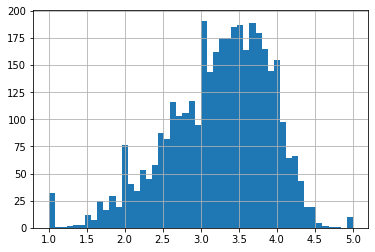

In [0]:
#Plot the ratings per movie on a historgram
import matplotlib.pyplot as plt
%matplotlib inline
ratings['rating'].hist(bins=50)

From the histogram, it can be seen that the majority of movie ratings fall between 2.5 and 4.0

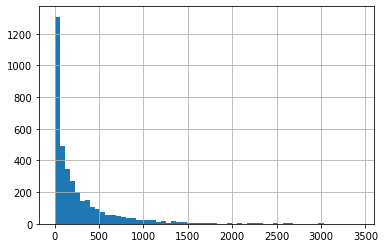

In [0]:
#Plot the histogram of the number of movie ratings per movie
ratings['number_of_ratings'].hist(bins=60)

The majority of movies have very few ratings

See the MovieRecommender_MachineLearning.ipynb for the machine learning portion of the term project.